In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use 2019 Q1 - 2025 Q3 data

# First, an investigation of stock prices
We get the close prices and volumes of each stock we are interested in. We also calculate the returns of each stock because prices are non-stationary and can rise over time even without meaningful relationships, while returns measure actual percentage changes in value. However, we want to use the the natural log of the returns to utilize some of its nice properties. For example, simple returns don't capture compounding changes well. If a stock rises 10% one day but drops 10% the next, the total isn't 0%, but actually -1%. For this case, simple returns would require multiplying, while log would just be additive.

We should also note that because SPY includes large-cap AI-related firms, correlations between individual stocks and SPY partially reflect mechanical overlap as well as broader market co-movement. But we can and should still use SPY as a benchmark.

In [2]:
AAPL = yf.Ticker("AAPL")
META = yf.Ticker("META")
AMZN = yf.Ticker("AMZN")
NVDA = yf.Ticker("NVDA")
GOOG = yf.Ticker("GOOG")
SPY = yf.Ticker("SPY")

In [3]:
def get_returns(ticker):
    start_date = "2018-12-31"
    end_date = "2025-09-30"
    returns = ticker.history(start=start_date, end=end_date)
    returns['simple_return'] = returns['Close'].pct_change()
    returns['log_return'] = np.log(returns['Close'] / returns['Close'].shift(1))
    returns = returns[['simple_return', 'log_return', 'Close', 'Volume']]
    returns.index = returns.index.date
    returns = returns.iloc[1:]
    return returns

AAPL_returns = get_returns(AAPL)
META_returns = get_returns(META)
AMZN_returns = get_returns(AMZN)
NVDA_returns = get_returns(NVDA)
GOOG_returns = get_returns(GOOG)
SPY_returns = get_returns(SPY)

In [4]:
AAPL_returns

,simple_return,log_return,Close,Volume
2019-01-02,0.001141,0.001140,37.538826,148158800
2019-01-03,-0.099608,-0.104925,33.799671,365248800
2019-01-04,0.042689,0.041803,35.242561,234428400
2019-01-07,-0.002226,-0.002229,35.164108,219111200
2019-01-08,0.019063,0.018884,35.834450,164101200
...,...,...,...,...
2025-09-23,-0.006443,-0.006464,254.183594,60275200
2025-09-24,-0.008332,-0.008367,252.065643,42303700
2025-09-25,0.018073,0.017912,256.621216,55202100
2025-09-26,-0.005489,-0.005504,255.212601,46076300


In [5]:
returns_data = {
    'NVDA': NVDA_returns,
    'AAPL': AAPL_returns,
    'META': META_returns,
    'AMZN': AMZN_returns,
    'GOOG': GOOG_returns,
    'SPY': SPY_returns
}

AIboom_cutoff = pd.Timestamp('2022-08-01')

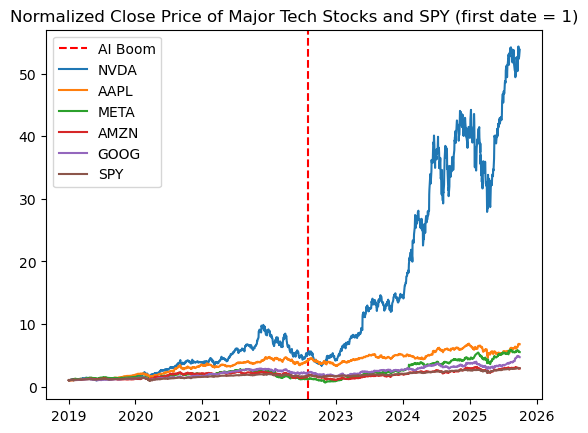

In [6]:
def plot_close_price_normalized(ticker_returns):
    plt.title(f'Normalized Close Price of Major Tech Stocks and SPY (first date = 1)')
    plt.axvline(x=AIboom_cutoff, color='red', linestyle='--', label='AI Boom')
    for name, returns_df in ticker_returns.items():
        normalized_close = returns_df['Close'] / returns_df['Close'].iloc[0]
        normalized_close.plot(label=name)
    plt.legend()
    plt.show()

plot_close_price_normalized(returns_data)


Because NVDA dominates this graph we will get the log to get a better look

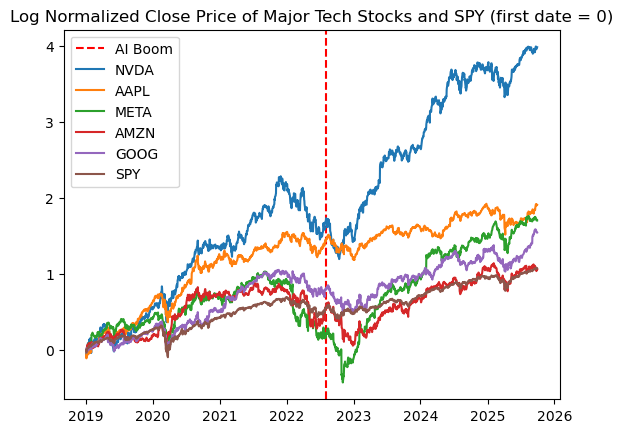

In [7]:
def log_plot_close_price_normalized(ticker_returns):
    plt.title('Log Normalized Close Price of Major Tech Stocks and SPY (first date = 0)')
    plt.axvline(x=AIboom_cutoff, color='red', linestyle='--', label='AI Boom')
    for name, returns_df in ticker_returns.items():
        normalized_close = np.log(returns_df['Close'] / returns_df['Close'].iloc[0])
        normalized_close.plot(label=name)
    plt.legend()
    plt.show()

log_plot_close_price_normalized(returns_data)

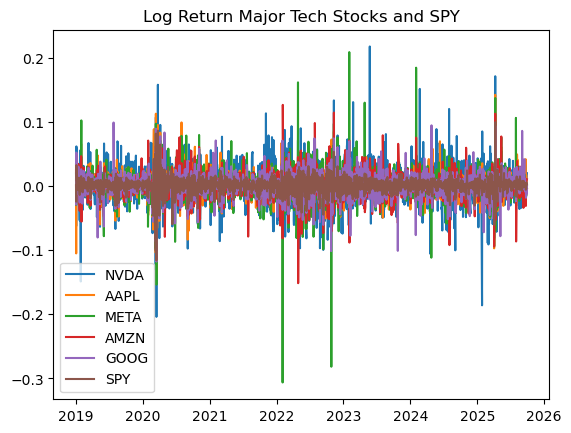

In [8]:
def plot_log_returns(ticker_returns):
    plt.title(f'Log Return Major Tech Stocks and SPY')
    for name, returns_df in ticker_returns.items():
        returns_df['log_return'].plot(label=name)
    plt.legend()
    plt.show()

plot_log_returns(returns_data)

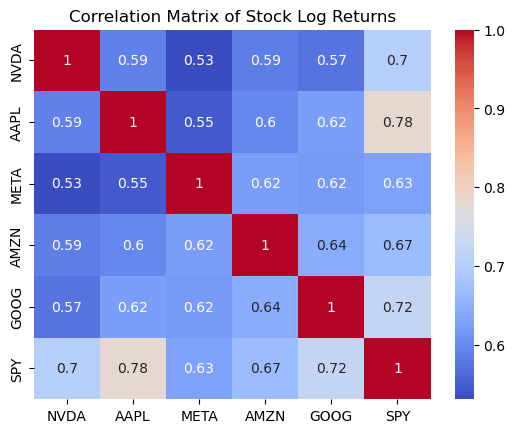

In [9]:
def get_correlation_matrix(ticker_returns, metric='log_return'):
    returns_data = {}
    for name, returns_df in ticker_returns.items():
        returns_data[name] = returns_df[metric]
    
    combined_returns = pd.DataFrame(returns_data)
    return combined_returns.corr()

correlation_matrix = get_correlation_matrix(returns_data)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Log Returns')
plt.show()

In [10]:
NVDA_returns

,simple_return,log_return,Close,Volume
2019-01-02,0.020375,0.020170,3.377354,508752000
2019-01-03,-0.060417,-0.062319,3.173305,705552000
2019-01-04,0.064068,0.062099,3.376611,585620000
2019-01-07,0.052941,0.051587,3.555371,709160000
2019-01-08,-0.024895,-0.025211,3.466859,786016000
...,...,...,...,...
2025-09-23,-0.028212,-0.028618,178.429993,192559600
2025-09-24,-0.008182,-0.008216,176.970001,143564100
2025-09-25,0.004068,0.004060,177.690002,191586700
2025-09-26,0.002814,0.002810,178.190002,148573700


In [11]:
data = {
    "Quarter": [
        "2025Q3","2025Q2","2025Q1","2024Q4","2024Q3","2024Q2","2024Q1",
        "2023Q4","2023Q3","2023Q2","2023Q1",
        "2022Q4","2022Q3","2022Q2","2022Q1",
        "2021Q4","2021Q3","2021Q2","2021Q1",
        "2020Q4","2020Q3","2020Q2","2020Q1",
        "2019Q4","2019Q3","2019Q2","2019Q1",
        "2018Q4","2018Q3","2018Q2","2018Q1",
        "2017Q4","2017Q3","2017Q2","2017Q1",
        "2016Q4","2016Q3","2016Q2","2016Q1",
        "2015Q4","2015Q3","2015Q2","2015Q1"
    ],
    "Total_Current_Assets": [
        102219, 89935, 80126, 67040, 59633, 53729, 44345,
        32658, 28797, 24883, 23073,
        28829, 25806, 25806, 18127,
        16055, 15161, 14393, 14681,
        19584, 13690, 12420, 11391,
        10629,10557,11386,10347,
        11386,10831,9448,9255,
        8479,8070,8116,8536,
        8307,6156,5790,6053,
        5713,5792,5832,5731
    ],
    "Total_Current_Liabilities": [
        24257,26542,18047,16479,13969,15223,10631,
        9101,10334,7260,6563,
        4335,3612,4448,4004,
        3925,3669,2410,1930,
        1903,1784,1475,1331,
        1389,1622,2252,2300,
        1608,1462,1106,1153,
        1032,983,823,1788,
        2041,2407,2377,2351,
        1488,1495,1459,1487
    ]
}

assets_liabilities = pd.DataFrame(data).set_index("Quarter")
assets_liabilities['Current_Ratio'] = assets_liabilities['Total_Current_Assets'] / assets_liabilities['Total_Current_Liabilities']
# Change Quarter to DatetimeIndex
quarter_to_date = {
    "2025Q3": "2025-09-30","2025Q2": "2025-06-30","2025Q1": "2025-03-31","2024Q4": "2024-12-31","2024Q3": "2024-09-30","2024Q2": "2024-06-30","2024Q1": "2024-03-31",
    "2023Q4": "2023-12-31","2023Q3": "2023-09-30","2023Q2": "2023-06-30","2023Q1": "2023-03-31",
    "2022Q4": "2022-12-31","2022Q3": "2022-09-30","2022Q2": "2022-06-30","2022Q1": "2022-03-31",
    "2021Q4": "2021-12-31","2021Q3": "2021-09-30","2021Q2": "2021-06-30","2021Q1": "2021-03-31",
    "2020Q4": "2020-12-31","2020Q3": "2020-09-30","2020Q2": "2020-06-30","2020Q1": "2020-03-31",
    "2019Q4": "2019-12-31","2019Q3": "2019-09-30","2019Q2": "2019-06-30","2019Q1": "2019-03-31",
    "2018Q4": "2018-12-31","2018Q3": "2018-09-30","2018Q2": "2018-06-30","2018Q1": "2018-03-31",
    "2017Q4": "2017-12-31","2017Q3": "2017-09-30","2017Q2": "2017-06-30","2017Q1": "2017-03-31",
    "2016Q4": "2016-12-31","2016Q3": "2016-09-30","2016Q2": "2016-06-30","2016Q1": "2016-03-31",
    "2015Q4": "2015-12-31","2015Q3": "2015-09-30","2015Q2": "2015-06-30","2015Q1": "2015-03-31"
}

assets_liabilities.index = pd.to_datetime(assets_liabilities.index.map(quarter_to_date))
assets_liabilities.reset_index(inplace=True)
# Rename Quarter to Date
assets_liabilities.rename(columns={"Quarter": "Date"}, inplace=True)
assets_liabilities = assets_liabilities.set_index("Date")
assets_liabilities

,Total_Current_Assets,Total_Current_Liabilities,Current_Ratio
Date,,,
2025-09-30,102219,24257,4.214000
2025-06-30,89935,26542,3.388403
2025-03-31,80126,18047,4.439851
2024-12-31,67040,16479,4.068208
2024-09-30,59633,13969,4.268953
2024-06-30,53729,15223,3.529462
2024-03-31,44345,10631,4.171292
2023-12-31,32658,9101,3.588397
2023-09-30,28797,10334,2.786627


In [12]:
# Resample by daily frequency (fill quarterly values across days)
assets_liabilities_daily = assets_liabilities.resample('D').ffill()

# Alternatively, if you want to align with your stock data date range:
start_date = "2019-01-01"
end_date = "2025-09-30"
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex to specific date range and forward fill
assets_liabilities_daily = assets_liabilities.reindex(date_range, method='ffill')

# Filter out weekends (Saturday=5, Sunday=6)
assets_liabilities_weekdays = assets_liabilities_daily[assets_liabilities_daily.index.weekday < 5]

# Alternatively, you can use business day frequency from the start
start_date = "2019-01-01"
end_date = "2025-09-30"
business_days = pd.bdate_range(start=start_date, end=end_date)

# Reindex to business days only and forward fill
assets_liabilities_business = assets_liabilities.reindex(business_days, method='ffill')

assets_liabilities_business


,Total_Current_Assets,Total_Current_Liabilities,Current_Ratio
2019-01-01,10347,2300,4.498696
2019-01-02,10347,2300,4.498696
2019-01-03,10347,2300,4.498696
2019-01-04,10347,2300,4.498696
2019-01-07,10347,2300,4.498696
...,...,...,...
2025-09-24,102219,24257,4.214000
2025-09-25,102219,24257,4.214000
2025-09-26,102219,24257,4.214000
2025-09-29,102219,24257,4.214000


In [13]:
# # Ensure both DataFrames have timezone-naive datetime indices
# if NVDA_returns.index.tz is not None:
#     NVDA_returns.index = NVDA_returns.index.tz_localize(None)

if assets_liabilities_business.index.tz is not None:
    assets_liabilities_business.index = assets_liabilities_business.index.tz_localize(None)

nvda_df = NVDA_returns.merge(assets_liabilities_business, left_index = True, right_index = True)

# Now merge should work
print(f"Merged dataframe shape: {nvda_df.shape}")
nvda_df.head()
nvda_df

Merged dataframe shape: (1695, 7)


,simple_return,log_return,Close,Volume,Total_Current_Assets,Total_Current_Liabilities,Current_Ratio
2019-01-02,0.020375,0.020170,3.377354,508752000,10347,2300,4.498696
2019-01-03,-0.060417,-0.062319,3.173305,705552000,10347,2300,4.498696
2019-01-04,0.064068,0.062099,3.376611,585620000,10347,2300,4.498696
2019-01-07,0.052941,0.051587,3.555371,709160000,10347,2300,4.498696
2019-01-08,-0.024895,-0.025211,3.466859,786016000,10347,2300,4.498696
...,...,...,...,...,...,...,...
2025-09-23,-0.028212,-0.028618,178.429993,192559600,102219,24257,4.214000
2025-09-24,-0.008182,-0.008216,176.970001,143564100,102219,24257,4.214000
2025-09-25,0.004068,0.004060,177.690002,191586700,102219,24257,4.214000
2025-09-26,0.002814,0.002810,178.190002,148573700,102219,24257,4.214000


Linear Regression Results:
Coefficient (slope): -0.000392
Intercept: 0.004486
R-squared: 0.000544
Correlation: -0.023333
P-value: 0.337026


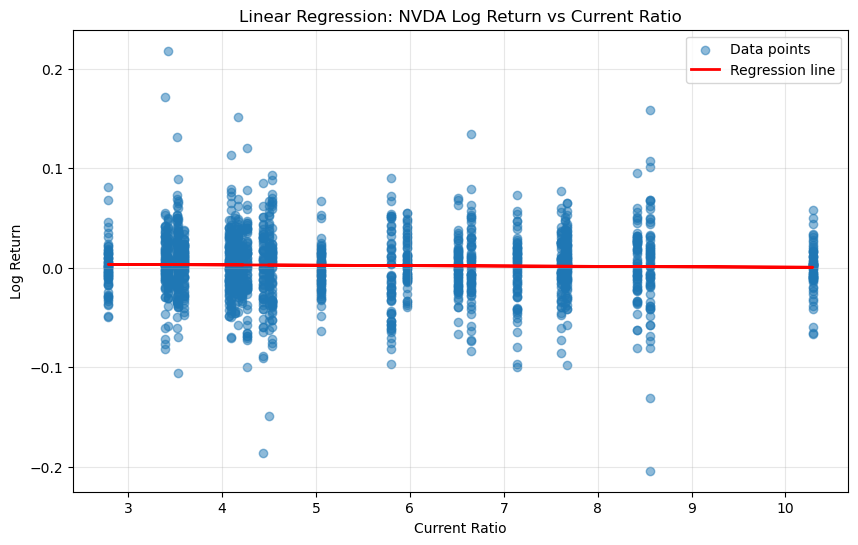


Regression equation: log_return = 0.004486 + -0.000392 * Current_Ratio


In [22]:
# Linear Regression on log_return based on current_ratio
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats

# Remove any NaN values
clean_data = nvda_df.dropna()

# Prepare the data
X = clean_data['Current_Ratio'].values.reshape(-1, 1)  # Independent variable
y = clean_data['log_return'].values  # Dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate statistics
r2 = r2_score(y, y_pred)
correlation = clean_data['Current_Ratio'].corr(clean_data['log_return'])

# Calculate p-value for correlation
_, p_value = stats.pearsonr(clean_data['Current_Ratio'], clean_data['log_return'])

print(f"Linear Regression Results:")
print(f"Coefficient (slope): {model.coef_[0]:.6f}")
print(f"Intercept: {model.intercept_:.6f}")
print(f"R-squared: {r2:.6f}")
print(f"Correlation: {correlation:.6f}")
print(f"P-value: {p_value:.6f}")

# Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Current_Ratio'], clean_data['log_return'], alpha=0.5, label='Data points')
plt.plot(clean_data['Current_Ratio'], y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Current Ratio')
plt.ylabel('Log Return')
plt.title('Linear Regression: NVDA Log Return vs Current Ratio')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Display regression equation
print(f"\nRegression equation: log_return = {model.intercept_:.6f} + {model.coef_[0]:.6f} * Current_Ratio")